<a href="https://colab.research.google.com/github/bhj8286/dinsosaur_machine_learning_study/blob/main/Cahpter4/0.4%EC%9E%A5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

트리
데이터 세트에 피처가 있거 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다.
많은 규칙이 있다는 건? 분류를 결정하는 방식이 복잡해진다는 얘기 -> 과적합으로 이어지기 쉽다.
즉, 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.
가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. --> 따라서 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=156)

In [ ]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

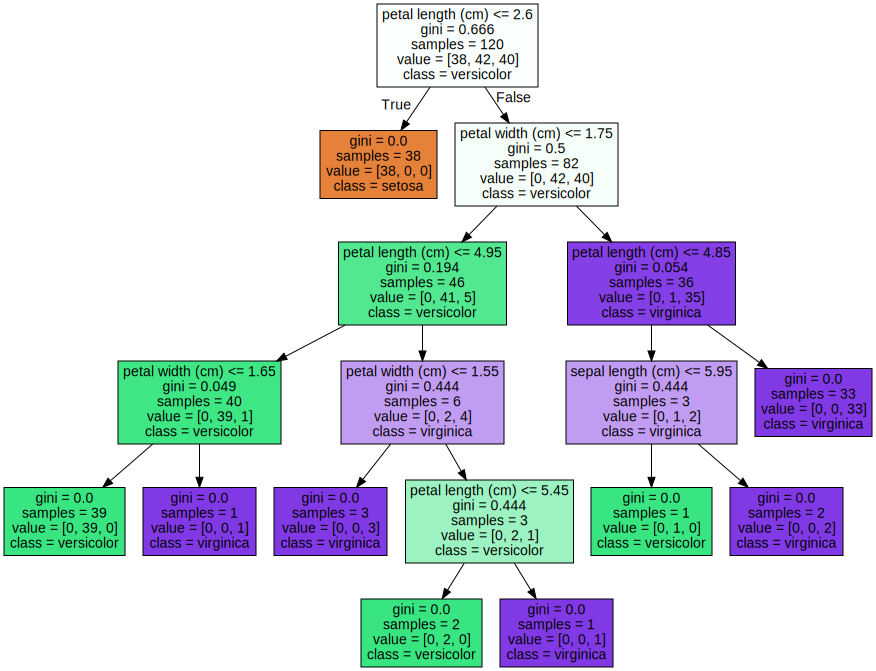

In [ ]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 경로 변경
%cd /content/drive/MyDrive/my/dinosaur

feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+',header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

Mounted at /content/drive
/content/drive/MyDrive/my/dinosaur
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():

  feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  X_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', names=feature_name)

  y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-3-01693cd5d4cc>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)


In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisionTressClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTressClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split': [16]
    }

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}
